### Data Extraction

In [3]:
import pandas as pd

# Load the dataset, specifying row 5 as the header
df = pd.read_csv("ILO_Unemployment_Report.csv")

df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.884500,6.983064,7.152157,7.274298,7.237563,7.426777,7.910291,8.303939,7.748144,7.740008
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.910000,9.002000,10.092000,11.180000,11.131000,11.082000,11.710000,12.075000,14.100000,15.378000
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.932125,4.197576,4.164130,4.238482,4.266695,4.277483,4.737501,4.585014,3.809080,3.664500
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.317000,16.448000,16.577000,16.639000,16.626000,16.500000,16.698000,15.800000,14.478000,14.223000


In [4]:
# List of East African countries
east_african_countries = ['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Burundi', 'South Sudan', 'Congo, Dem. Rep.']

# Filter the DataFrame to include only East African countries
east_african_df = df[df['Country Name'].isin(east_african_countries)]

# Drop columns for years outside the range of interest (2013 to 2023)
years_to_keep = [str(year) for year in range(2013, 2024)]
east_african_df = east_african_df[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + years_to_keep]

# Display the first few rows of the new DataFrame
east_african_df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
16,Burundi,BDI,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1.575,1.570,1.517,1.383,1.263,1.143,1.027,1.030,1.138,0.906,0.860
43,"Congo, Dem. Rep.",COD,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,4.469,4.427,4.435,4.556,4.675,4.703,4.670,5.489,5.508,4.685,4.499
121,Kenya,KEN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2.778,2.782,2.771,2.760,3.560,4.296,5.010,5.628,5.690,5.644,5.601
203,Rwanda,RWA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,11.800,11.866,11.853,11.799,11.880,10.760,11.240,11.830,15.790,15.080,14.945
216,South Sudan,SSD,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,12.731,12.564,12.411,13.128,13.404,13.170,12.781,14.413,14.295,12.442,12.038


### Data Cleaning and Preprocessing

In [7]:
# Get the data types of each column
east_african_df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
2022              float64
2023              float64
dtype: object

In [9]:
# Remove duplicate rows
east_african_df.drop_duplicates(inplace=True)

In [10]:
# Outlier Detection and Handling using Z-score
from scipy.stats import zscore
z_scores = zscore(east_african_df[years_to_keep])
outliers = (z_scores > 3).any(axis=1)
east_african_df = east_african_df[~outliers]


In [11]:
# Feature Engineering
# The average unemployment rate over the 10-year period
east_african_df['Average_Unemployment_Rate'] = east_african_df[years_to_keep].mean(axis=1)


In [20]:
# Print the first few rows of the modified DataFrame
east_african_df.head()


,Country Code,Indicator Name,Indicator Code,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Average_Unemployment_Rate
Country Name,,,,,,,,,,,,,,,
Burundi,BDI,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1.575,1.570,1.517,1.383,1.263,1.143,1.027,1.030,1.138,0.906,0.860,1.219273
"Congo, Dem. Rep.",COD,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,4.469,4.427,4.435,4.556,4.675,4.703,4.670,5.489,5.508,4.685,4.499,4.737818
Kenya,KEN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2.778,2.782,2.771,2.760,3.560,4.296,5.010,5.628,5.690,5.644,5.601,4.229091
Rwanda,RWA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,11.800,11.866,11.853,11.799,11.880,10.760,11.240,11.830,15.790,15.080,14.945,12.622091
South Sudan,SSD,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,12.731,12.564,12.411,13.128,13.404,13.170,12.781,14.413,14.295,12.442,12.038,13.034273


### Data Analysis

In [13]:
# Calculate summary statistics
summary_stats = east_african_df.describe()
print(summary_stats)


            2013       2014       2015       2016       2017       2018  \
count   7.000000   7.000000   7.000000   7.000000   7.000000   7.000000   
mean    5.456143   5.394000   5.415571   5.566286   5.810429   5.684857   
std     4.749294   4.746693   4.676360   4.824786   4.811705   4.505498   
min     1.575000   1.570000   1.517000   1.383000   1.263000   1.143000   
25%     2.344000   2.274500   2.450000   2.474500   2.905500   2.861000   
50%     2.930000   2.782000   2.793000   3.149000   3.640000   4.296000   
75%     8.134500   8.146500   8.144000   8.177500   8.277500   7.731500   
max    12.731000  12.564000  12.411000  13.128000  13.404000  13.170000   

            2019       2020       2021       2022       2023  \
count   7.000000   7.000000   7.000000   7.000000   7.000000   
mean    5.754571   6.426000   6.958143   6.328286   6.192857   
std     4.499881   4.894781   5.754425   5.352750   5.272875   
min     1.027000   1.030000   1.138000   0.906000   0.860000   
25% 

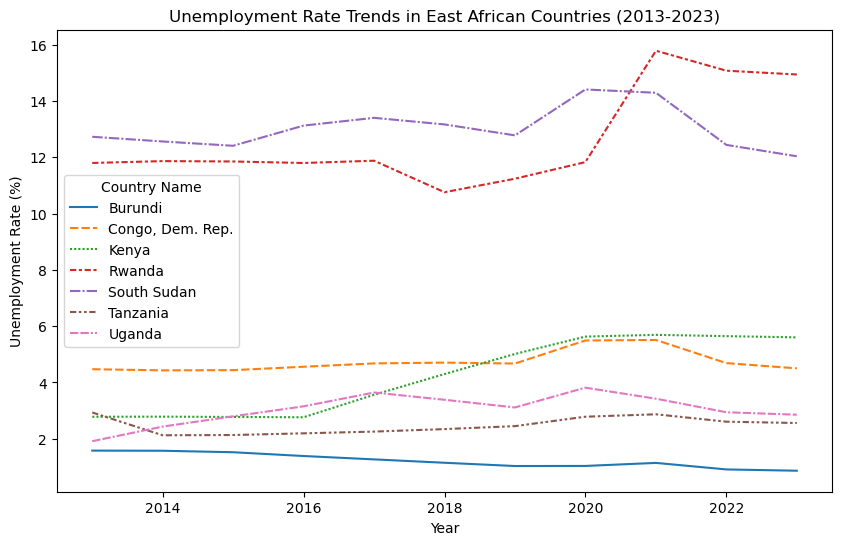

In [23]:
# Visualize time series of unemployment rates for each country
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Reset the index
east_african_df.reset_index(inplace=True)

# Get the columns representing the years
year_columns = [col for col in east_african_df.columns if col.isdigit()]

# Subset the dataframe to include only the year columns
east_african_df_years = east_african_df.set_index('Country Name')[year_columns]

# Transpose the dataframe for seaborn lineplot
east_african_df_transposed = east_african_df_years.transpose()

# Convert index to datetime
east_african_df_transposed.index = pd.to_datetime(east_african_df_transposed.index, format='%Y')

# Create a line plot for each country's unemployment rate over time
plt.figure(figsize=(10,6))
sns.lineplot(data=east_african_df_transposed)

plt.title('Unemployment Rate Trends in East African Countries (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Country Name')
plt.show()


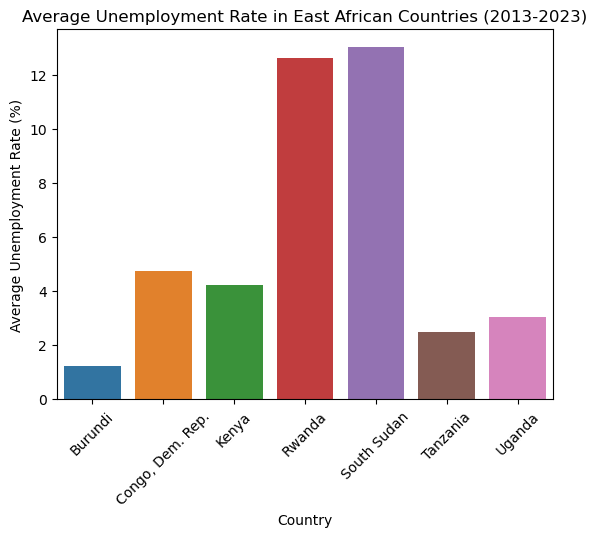

In [24]:
# Calculate average unemployment rates for each country
average_unemployment = east_african_df[years_to_keep].mean(axis=1)

# Visualize comparative analysis of average unemployment rates
import seaborn as sns

sns.barplot(x='Country Name', y=average_unemployment, data=east_african_df)
plt.xlabel('Country')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Average Unemployment Rate in East African Countries (2013-2023)')
plt.xticks(rotation=45)
plt.show()

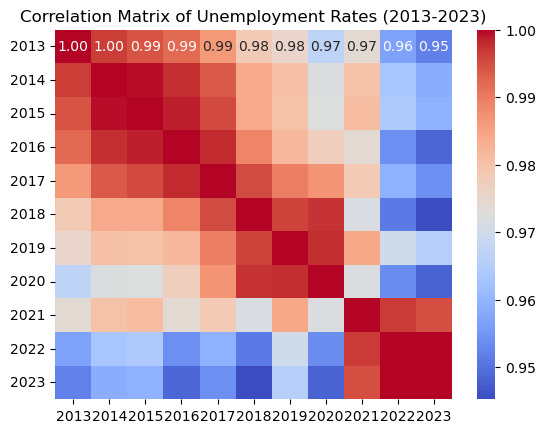

In [25]:
# Calculate correlation matrix
correlation_matrix = east_african_df[years_to_keep].corr()

# Visualize correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Unemployment Rates (2013-2023)')
plt.show()


### Data Visualization

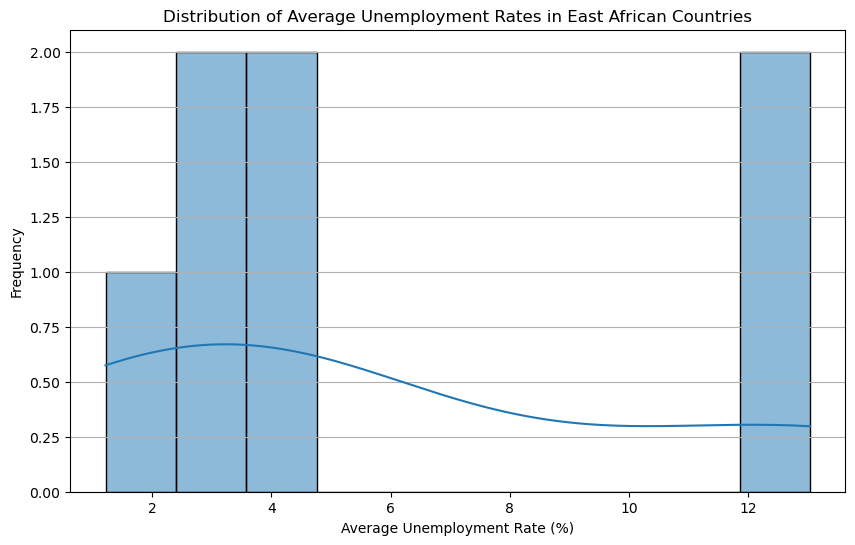

In [26]:
# Histogram of average unemployment rates
plt.figure(figsize=(10, 6))

sns.histplot(average_unemployment, bins=10, kde=True)
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Unemployment Rates in East African Countries')
plt.grid(axis='y')
plt.show()


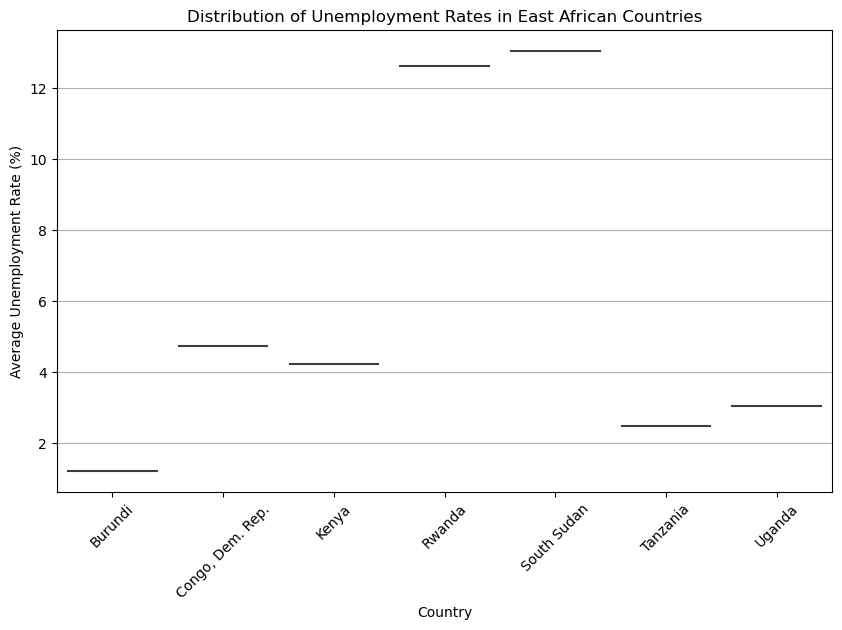

In [27]:
# Violin plot of unemployment rates
plt.figure(figsize=(10, 6))

sns.violinplot(x=east_african_df['Country Name'], y=average_unemployment)
plt.xlabel('Country')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Distribution of Unemployment Rates in East African Countries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


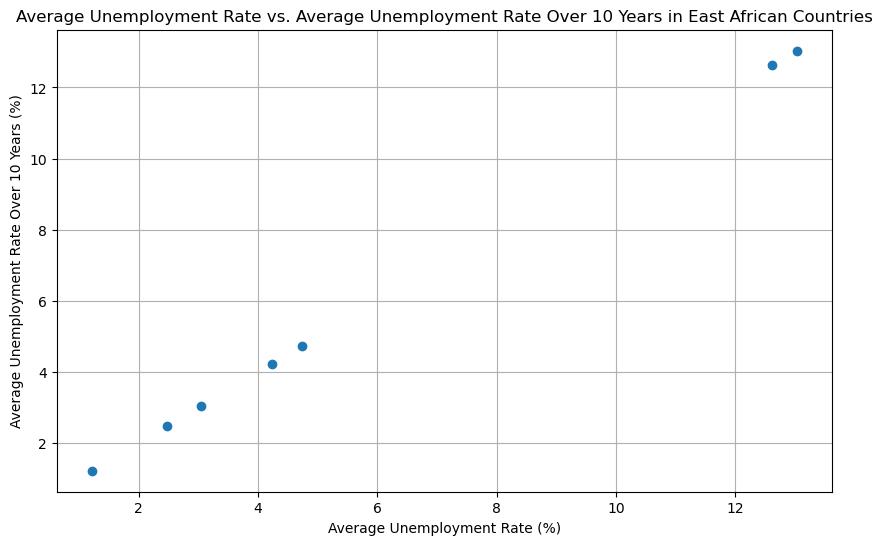

In [29]:
# Scatter plot of average unemployment rates vs. years
plt.figure(figsize=(10, 6))

plt.scatter(east_african_df['Average_Unemployment_Rate'], east_african_df[years_to_keep].mean(axis=1))
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Average Unemployment Rate Over 10 Years (%)')
plt.title('Average Unemployment Rate vs. Average Unemployment Rate Over 10 Years in East African Countries')
plt.grid(True)
plt.show()


### Predictive Modelling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the feature matrix (X) and target variable (y)
X = east_african_df[years_to_keep].values
y = east_african_df['Average_Unemployment_Rate'].values

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Print the actual values and predictions
print("Actual\t\tPrediction")
for i in range(len(y_test)):
    print(f"{y_test[i]:.2f}\t\t{y_pred[i]:.2f}")

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print('\nMean Squared Error:', mse)

Actual		Prediction
1.22		1.22
4.74		4.74

Mean Squared Error: 5.419457982678166e-06


In [33]:
import pandas as pd

# Prepare the feature matrix (X) and target variable (y)
X = east_african_df[years_to_keep].values
y = east_african_df['Average_Unemployment_Rate'].values

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Define the number of years to forecast
num_years = 5

# Get the last available year
last_year = int(years_to_keep[-1])

# Predict unemployment rates for the next 5 years for each country
next_years = np.arange(last_year + 1, last_year + num_years + 1)
predictions = []

for i, country in enumerate(east_african_df['Country Name']):
    country_data = east_african_df.iloc[i][years_to_keep].values.reshape(1, -1)
    country_predictions = []
    for year in next_years:
        next_year_pred = model.predict(country_data)
        country_predictions.append(next_year_pred[0])
        # Update country data with predicted value for the next year
        country_data = np.append(country_data[:, 1:], next_year_pred).reshape(1, -1)
    predictions.append(country_predictions)

# Create a DataFrame to display the predicted unemployment rates
predicted_df = pd.DataFrame(predictions, columns=next_years, index=east_african_df['Country Name'])

# Print the DataFrame
print(predicted_df)


                       2024       2025       2026       2027       2028
Country Name                                                           
Burundi            1.219273   1.185926   1.151182   1.119304   1.094953
Congo, Dem. Rep.   4.737818   4.759508   4.790716   4.825663   4.848868
Kenya              4.229091   4.363885   4.506456   4.660158   4.833759
Rwanda            12.622091  12.689749  12.768480  12.853648  12.956324
South Sudan       13.034273  13.052542  13.099262  13.169776  13.170252
Tanzania           2.473545   2.431255   2.460210   2.490601   2.517538
Uganda             3.039364   3.139730   3.203709   3.244804   3.252359
